In [67]:
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv('../data/metadata.csv')
data.head()


,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,NaN,...,NaN,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.0,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,NaN,...,NaN,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.0,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


In [69]:
image_count = len(data['img_id'])
patient_count = len(data['patient_id'].value_counts())
lesion_count = len(data['lesion_id'].value_counts())
print(f'There are {image_count} images of {lesion_count} from {patient_count} patients.')

There are 2298 images of 1641 from 1373 patients.


In [71]:
print(data.columns)

Index(['patient_id', 'lesion_id', 'smoke', 'drink', 'background_father',
       'background_mother', 'age', 'pesticide', 'gender',
       'skin_cancer_history', 'cancer_history', 'has_piped_water',
       'has_sewage_system', 'fitspatrick', 'region', 'diameter_1',
       'diameter_2', 'diagnostic', 'itch', 'grew', 'hurt', 'changed', 'bleed',
       'elevation', 'img_id', 'biopsed'],
      dtype='object')


#### diagnosis distribution

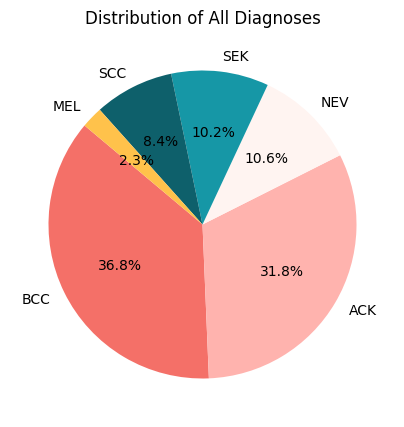

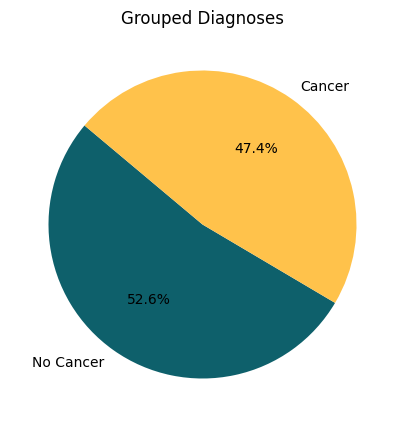

In [101]:
colors1 = ['#f47068', '#ffb3ae', '#fff4f1', '#1697a6', '#0e606b', '#ffc24b']
colors2 = ['#0e606b', '#ffc24b']

# All diagnoses
diagnoses = data['diagnostic'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(diagnoses, labels=diagnoses.index, autopct='%1.1f%%', colors=colors1, startangle=140)
plt.title('Distribution of All Diagnoses')

plt.show()

# Grouped diagnoses
def group_diagnoses(diagnosis):
    if diagnosis in ['MEL', 'BCC', 'SCC']:
        return 'Cancer'
    elif diagnosis in ['NEV', 'ACK', 'SEK']:
        return 'No Cancer'
    else:
        return 'Other'

data['diagnosis_group'] = data['diagnostic'].apply(group_diagnoses)
diagnosis_counts = data['diagnosis_group'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', colors=colors2, startangle=140)
plt.title('Grouped Diagnoses')

plt.show()


#### lookup diagnosis from filename

In [18]:
data.set_index('img_id', inplace=True)

def get_diagnosis(filename):
    try:
        return data.loc[filename, 'diagnostic']
    except KeyError:
        return "Filename not found in dataset."

filename = 'PAT_85_129_225.png'
diagnosis = get_diagnosis(filename)
print(f"The diagnosis for {filename} is: {diagnosis}")

The diagnosis for PAT_85_129_225.png is: ACK
